## pair0018: 
Data were collected on the concentration of a chemical GAG in the urine of 314 children aged from zero to seventeen years. The aim of the study was to produce a chart to help a paediatrican to assess if a child's GAG concentration is ‘normal’.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from diptest import diptest

In [2]:
# Load dataset
df = pd.read_csv('datasets/pair0018.txt', delimiter=' ', header=None, names=['X', 'Y'])

In [3]:
# Display few rows of the dataset
print(df.head())    

      X     Y
0  0.00  23.0
1  0.00  23.8
2  0.00  16.9
3  0.00  18.6
4  0.01  17.9


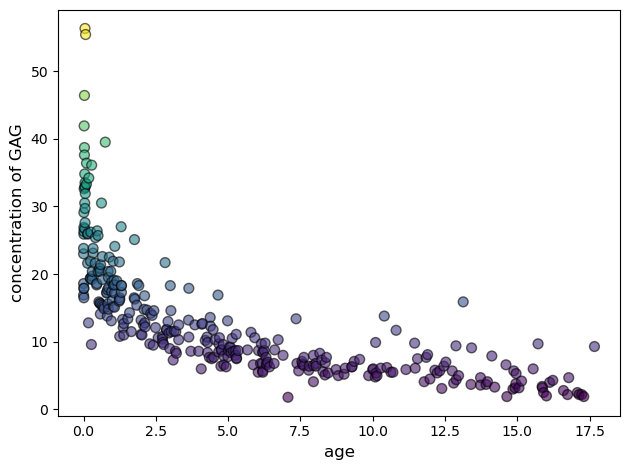

In [4]:
scatter = plt.scatter(
    df['X'], 
    df['Y'], 
    c=df['Y'],  # Color based on Y values
    cmap='viridis',  
    alpha=0.6,  # Transparency for overlapping points
    edgecolor='k',  
    s=50  # Marker size
)

# Add labels and title
plt.xlabel('age', fontsize=12)
plt.ylabel('concentration of GAG', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


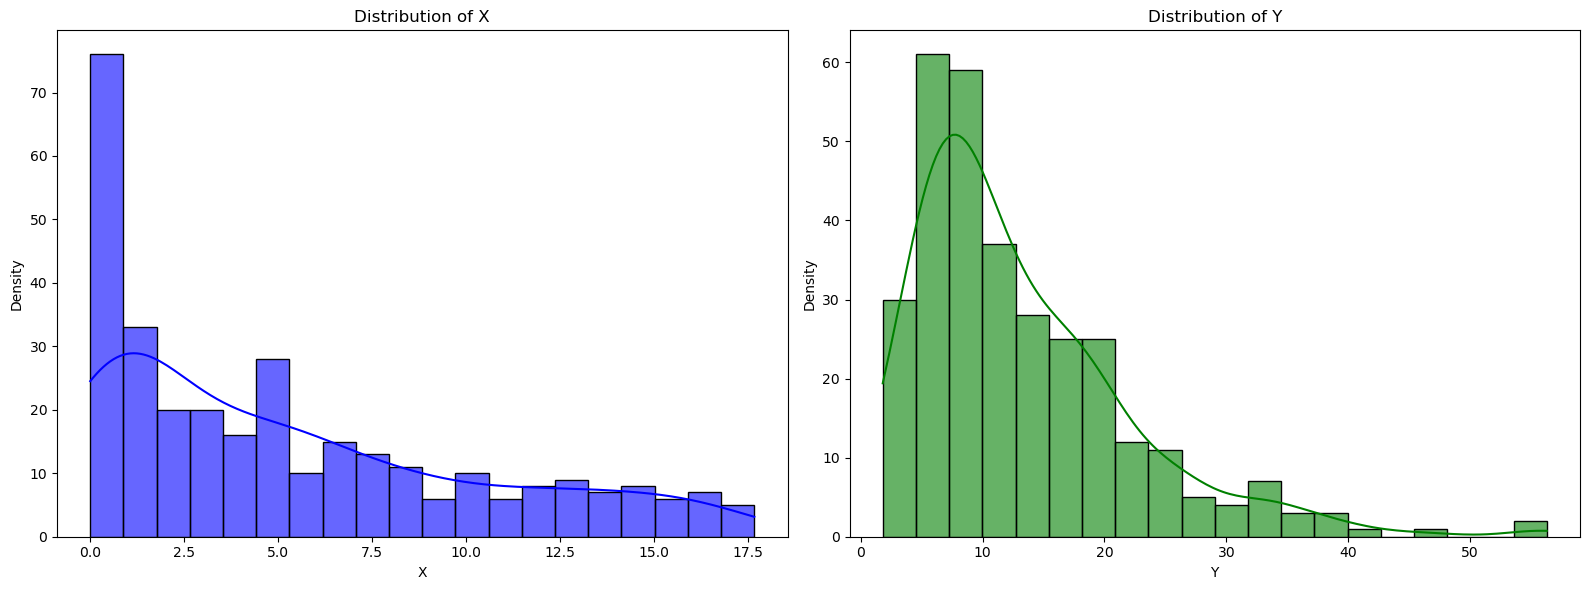

In [5]:
# Plot the distribution of the data
fig, axis = plt.subplots(1, 2, figsize=(16, 6))

# Plot for X
sns.histplot(df['X'], kde=True, bins=20, color='blue', ax=axis[0], alpha=0.6)
axis[0].set_title('Distribution of X')
axis[0].set_xlabel('X')
axis[0].set_ylabel('Density')

# Plot for Y
sns.histplot(df['Y'], kde=True, bins=20, color='green', ax=axis[1], alpha=0.6)
axis[1].set_title('Distribution of Y')
axis[1].set_xlabel('Y')
axis[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
def check_modality(column_name, data, threshold=0.05):
    dip_test, p_val = diptest(data)
    if p_val < threshold:
        print(f"Dip-Test ({column_name}): {dip_test}, p-value: {p_val} -> Multimodal")
    else:
        print(f"Dip-Test ({column_name}): {dip_test}, p-value: {p_val} -> Unimodal")

# Example usage with a DataFrame
check_modality("X", np.array(df['X']))
check_modality("Y", np.array(df['Y']))

Dip-Test (X): 0.01840764331210189, p-value: 0.7009809116024324 -> Unimodal
Dip-Test (Y): 0.01433121019108279, p-value: 0.966518748588803 -> Unimodal
